<a href="https://colab.research.google.com/github/PRAISE-KING/wk-4-ai-for-software-engineering/blob/main/Automatic_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

# 2. Load dataset directly from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [10]:
# 3. Add target (0 = malignant, 1 = benign)
df['diagnosis'] = 1 - data.target

In [11]:
# 4. Create a simulated 'priority' column based on 'mean radius'
def assign_priority(radius):
    if radius > 18:
        return 'High'
    elif radius > 14:
        return 'Medium'
    else:
        return 'Low'

df['priority'] = df['mean radius'].apply(assign_priority)

In [12]:
# 5. Encode priority as target labels
df['priority_encoded'] = df['priority'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [13]:
# 6. Prepare features and target
X = df.drop(columns=['priority', 'priority_encoded'])
y = df['priority_encoded']

In [14]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# 8. Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# 9. Predict and evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
F1 Score (weighted): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        17

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



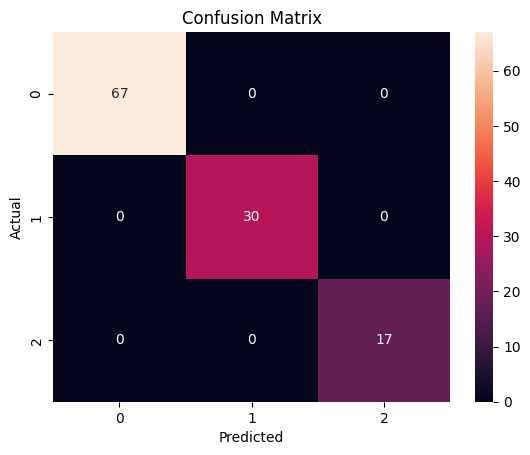

In [17]:
# 10. Confusion Matrix
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()